In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection

In [2]:
df_train = pd.read_csv('train.csv')
df_test =  pd.read_csv('test.csv')

In [3]:
def preprocess(df):
    del df['PassengerId']    
    
    for col in ['Sex', 'Ticket', 'Cabin', 'Embarked', 'Fare']:
        le = preprocessing.LabelEncoder()
        le.fit(df[col].values)
        df[col] = le.transform(df[col].values)
    
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    
    df['Name'] = df['Name'].map(lambda s : len(s))    
    return df

In [4]:
df_train = preprocess(df_train)
inds = df_test['PassengerId'].values
df_test = preprocess(df_test)

In [5]:
X_train, y_train = df_train.drop(columns = 'Survived').values, df_train['Survived'].values
X_test = df_test.values

In [6]:
X_train.shape

(891, 10)

In [7]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.2)

In [8]:
X_train.shape

(712, 10)

# Model training

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as opt
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [10]:
X_train = torch.from_numpy(X_train).to(torch.float32)
X_val = torch.from_numpy(X_val).to(torch.float32)
y_train = torch.from_numpy(y_train.reshape(y_train.shape[0], 1)).to(torch.float32)
y_val = torch.from_numpy(y_val.reshape(y_val.shape[0], 1)).to(torch.float32)
X_test = torch.from_numpy(X_test).to(torch.float32)

  0%|          | 0/2000 [00:00<?, ?it/s]

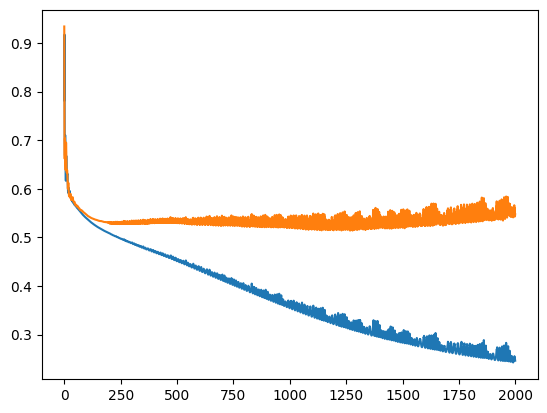

In [58]:
mid = 200

network = nn.Sequential(
    nn.Linear(X_train.shape[1], mid),
    nn.PReLU(),
    nn.Linear(mid, mid),
    nn.PReLU(),
    nn.Linear(mid, mid),
    nn.PReLU(),
    nn.Linear(mid, mid),
    nn.PReLU(),
    nn.Linear(mid, 1),
    nn.Sigmoid()
)

optimizer = torch.optim.Adam(network.parameters(), lr=1e-4)

losses = []
val_losses = []
f1s = []
epochs_nums = 2000
for i in tqdm(range(epochs_nums)):
    y_pred = network(X_train)
    loss = F.binary_cross_entropy(y_pred, y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.item())
    
    y_val_pred = network(X_val)
    val_losses.append(F.binary_cross_entropy(y_val_pred, y_val).item())
    
    kek1 = y_val.detach().numpy().reshape(y_val.shape[0])
    kek2 = y_val_pred.detach().numpy().reshape(y_val.shape[0]).round()
    f1s.append(f1_score(kek1, kek2))

plt.plot(range(epochs_nums), losses)
plt.plot(range(epochs_nums), val_losses)
plt.show()

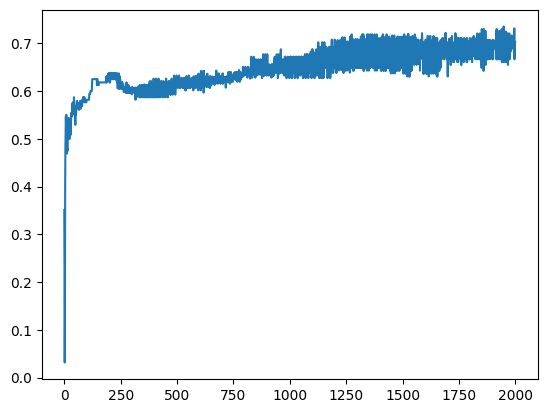

In [59]:
plt.plot(range(epochs_nums), f1s)

In [60]:
y_val_pred = network(X_val)
kek1 = y_val.detach().numpy().reshape(y_val.shape[0])
kek2 = y_val_pred.detach().numpy().reshape(y_val.shape[0]).round()
f1_score(kek1, kek2)

0.703125

In [14]:
res = network(X_test).detach().numpy().reshape(X_test.shape[0])

In [15]:
res = res.round().astype(int)

In [16]:
res

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [17]:
d = {'PassengerId': inds, 'Survived': res}
df = pd.DataFrame(data=d)

In [18]:
df.to_csv('my_res.csv', index=False)